In [18]:
import glob
import os

import krippendorff
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from utils import *

In [19]:
# Gestion des warnings
warnings.filterwarnings("ignore")

# Agrégation des tableaux de veille

In [20]:
# Chemin vers le dossier 'data'
data_dir = "data"
base_file_name = "Tableau_lecture_presse-ecrite_Ete2025_veilleur*"

# Cherche tous les fichiers correspondants dans les sous-dossiers
file_pattern = os.path.join(data_dir, "**", base_file_name)
files = glob.glob(file_pattern, recursive=True)

# Lis et concatène tous les fichiers trouvés
df_list = [pd.read_excel(f, sheet_name="Articles à lire", skiprows=1) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Affiche la taille du DataFrame
print(f"Nombre de lignes concaténées : {len(df)}")

Nombre de lignes concaténées : 229


In [21]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege.xlsx")
df.to_excel(output_file, index=False)

# Vérification de l'agrégation

In [22]:
# Résumé du tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 18 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Personne en charge de la veille (nom, prénom)                                                                     229 non-null    object
 1   Pack                                                                                                              229 non-null    object
 2   Titre                                                                                                             229 non-null    object
 3   Lien ou titre de l'article                                                                                        229 non-null    object
 4   Le sujet de l'article concerne-t-il un

In [23]:
# Premières lignes du DataFrame
df.head(3)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau
0,veilleur_1,Base,Pourquoi le Groenland est l'objet des plus gra...,LePointfr_1744820405000_2360.pdf,"Ressources naturelles, Biodiversité","conséquences, constats",Industrie,NaN,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,Métaux/minerais,Reportage abordant plusieurs enjeux du Groenla...,L'article aborde 2 crises mais ne fait pas le ...
1,veilleur_1,Base,"Les secrets bien gardés de Montecristo, « l'îl...",LePointfr_1745384703000_4434.pdf,Biodiversité,solutions,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,NaN,aucun milieu en particulier,NaN,NaN,NaN,Action de protection de l'Ile de Monte Cristo ...,"là du coup, j'aurais eu envie de mettre action..."
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...


In [24]:
# Verification 
df.groupby(["Personne en charge de la veille (nom, prénom)", "Pack"]).size().reset_index(name='Nombre d\'articles')

,"Personne en charge de la veille (nom, prénom)",Pack,Nombre d'articles
0,Raphaël DEMONCHY,Base,4
1,Véronique ETIENNE,Base,5
2,Véronique ETIENNE,premium,9
3,veilleur_1,Base,9
4,veilleur_1,premium,10
5,veilleur_10,Base,1
6,veilleur_11,Base,10
7,veilleur_11,premium,9
8,veilleur_12,Base,9
9,veilleur_12,premium,7


In [25]:
# Verification 
df.groupby(["Titre"]).size().reset_index(name='Nombre d\'articles')

,Titre,Nombre d'articles
0,16 avril 1970 : un glissement de terrain cause...,5
1,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",5
2,Auray La goélette Tara fait une escale dédiée ...,5
3,Auray Le nouveau complexe de La Forêt a accuei...,5
4,Carrières 5 moyens de décrocher un job à impact,13
5,Ces entrepreneuses vous habillent en mode éthique,5
6,Chaud devant; Comment faire un nid sans chimie...,5
7,CriseiDes signes de reprise,5
8,"Dans le Var, les grands moyens pour sauver la ...",5
9,De bonnes nouvelles,8


# Analyse des résultats

## Identification des articles analysés

In [26]:
## Si aucune colonne n'a été remplie, on considère que l'article n'a pas été lu
df["veille_ok"] = df.apply(lambda x: x[4:].isna().all()==False, axis=1)
df.tail(6)

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
223,veilleur_9,premium,Solutions Champions de l’économie sociale et e...,AujourdhuienFrance_1745285430000_145.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
224,veilleur_9,premium,Saint-Brieuc « Dire qu’on ne fait rien ce n’es...,LeTélégramme_1745387667000_4237.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
225,veilleur_9,premium,MCôtes-d'Armor Marais du Launay : comment la f...,LeTélégramme_1745387669000_4302.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
226,veilleur_9,premium,Ces entrepreneuses vous habillent en mode éthique,LeParisien_1745285431000_2153.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
227,veilleur_9,premium,Chaud devant; Comment faire un nid sans chimie...,LeMonde_1744455618000_3319.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
228,veilleur_9,premium,La consultation publique sur le projet de porc...,LaMontagne_1745356777000_3215.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [27]:
# Verification que tous les articles non lus sont dans le pack premium
df.groupby(["veille_ok", "Pack"]).size().reset_index(name='Nombre d\'articles')

,veille_ok,Pack,Nombre d'articles
0,False,Base,2
1,False,premium,75
2,True,Base,114
3,True,premium,38


In [28]:
# Analyse des résultats
df.groupby(["Pack", "Titre"])["veille_ok"].value_counts().reset_index(name='Nombre d\'articles') 

,Pack,Titre,veille_ok,Nombre d'articles
0,Base,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",True,5
1,Base,Auray La goélette Tara fait une escale dédiée ...,True,5
2,Base,Auray Le nouveau complexe de La Forêt a accuei...,True,5
3,Base,Carrières 5 moyens de décrocher un job à impact,True,5
4,Base,CriseiDes signes de reprise,True,5
...,...,...,...,...
56,premium,«Nous sommes des amortisseurs de crise»,True,2
57,premium,«Pas de ZFE sans alternative» selon le député ...,False,4
58,premium,«Pas de ZFE sans alternative» selon le député ...,True,1
59,premium,"À La Rochelle, on sait recycler les terres rar...",False,4


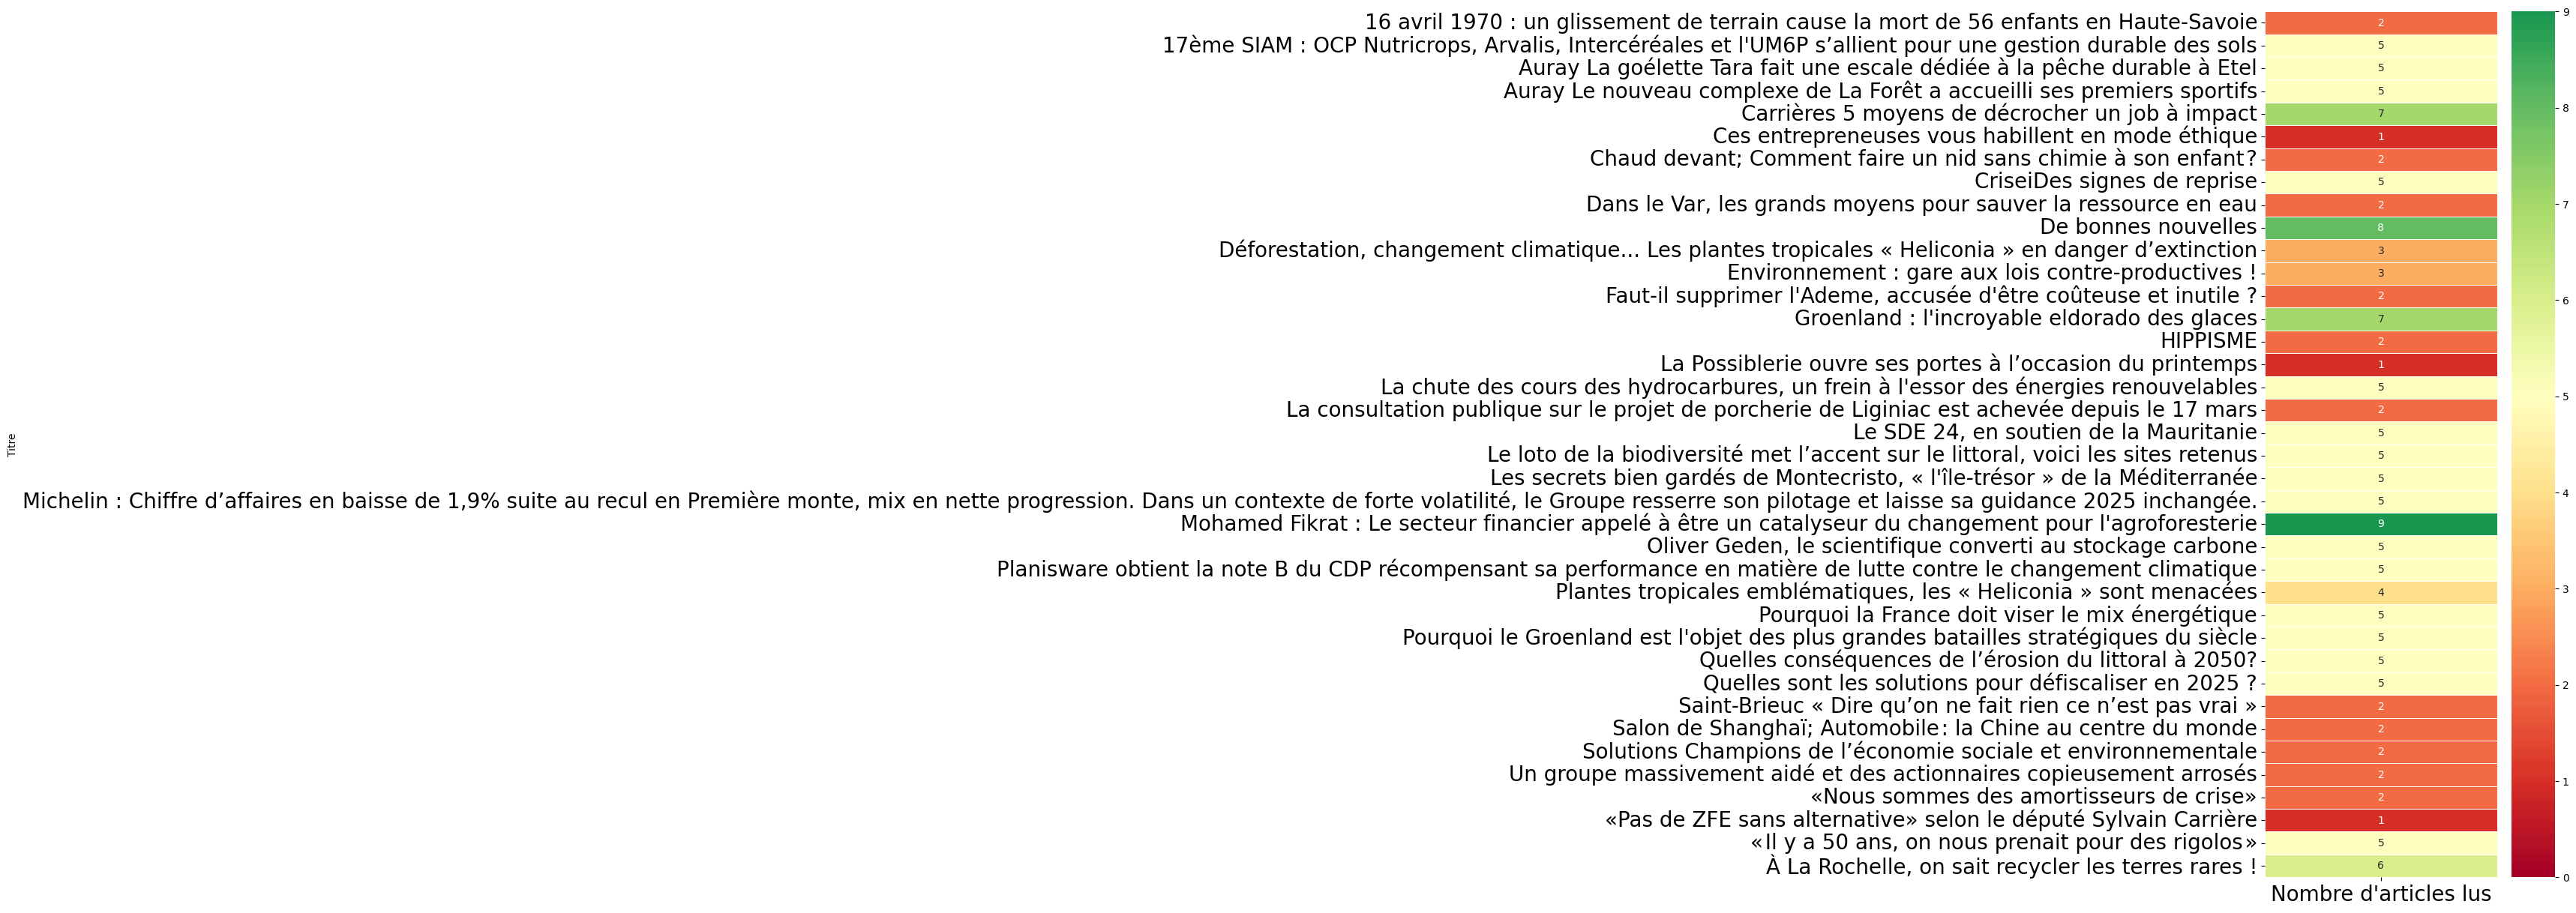

In [29]:
# Visualisation
plt.figure(figsize=(5, 15))
heatmap_data = df[df["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5
)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [30]:
# Préparation des données
df_base = df[df["Pack"] == "Base"]
df_premium = df[df["Pack"] == "premium"]

heatmap_base = df_base[df_base["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")
heatmap_premium = df_premium[df_premium["veille_ok"] == True].groupby("Titre")["veille_ok"].count().to_frame(name="Nombre d'articles lus")

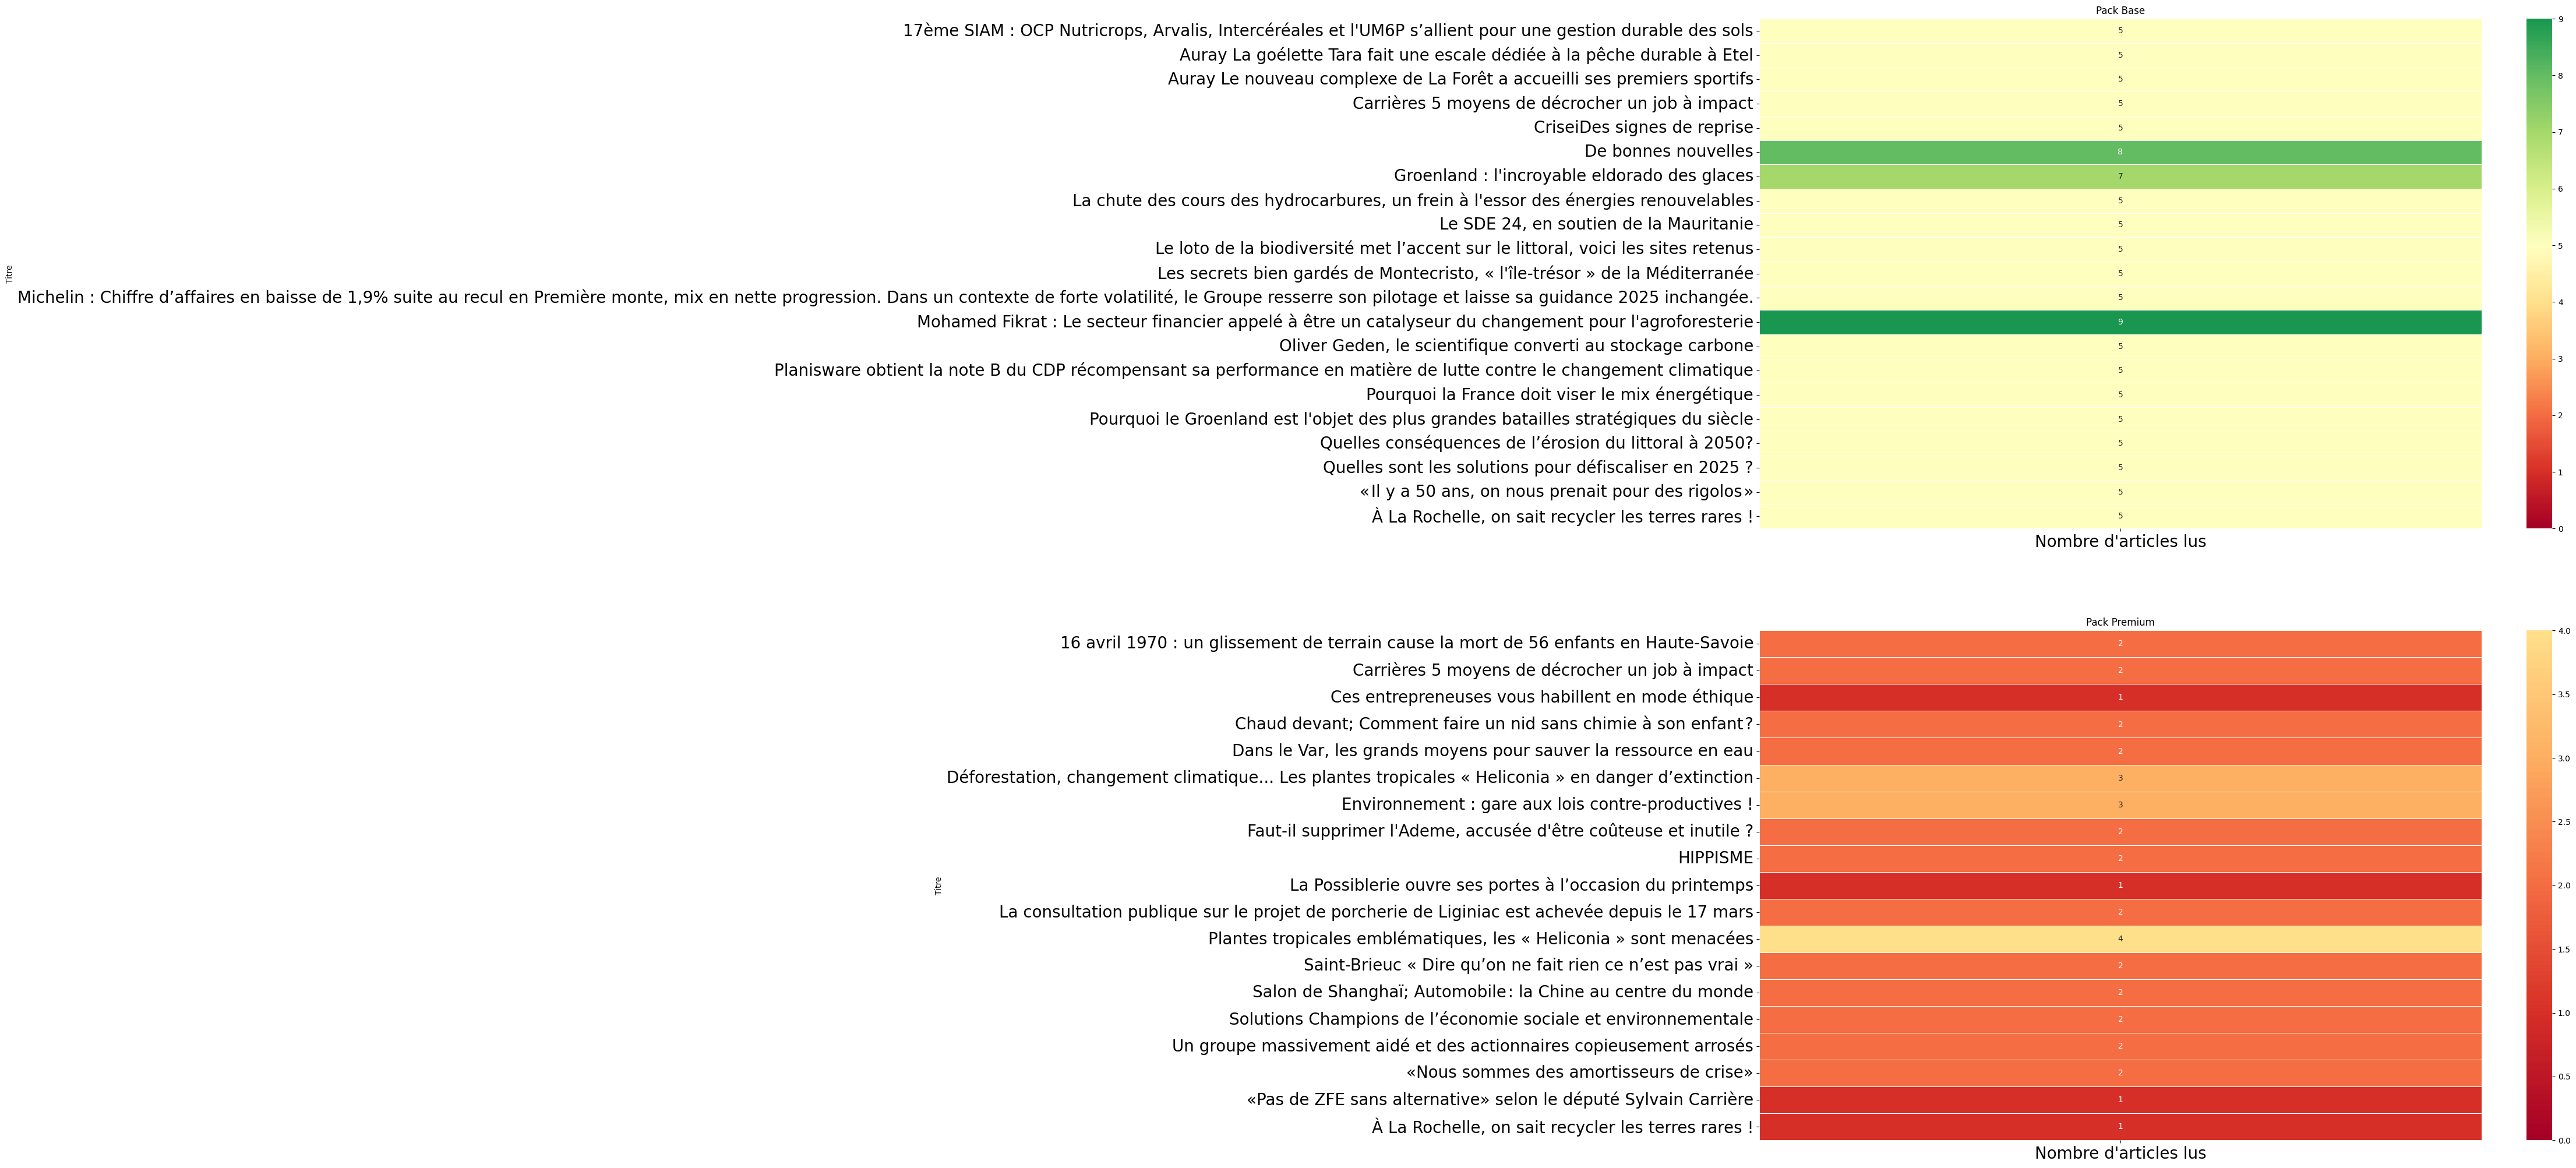

In [31]:
# Visualisation
fig, ax = plt.subplots(2, 1, figsize=(20, 25))
ax[0].set_title("Pack Base")
sns.heatmap(
    heatmap_base,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[0]
)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)


ax[1].set_title("Pack Premium")
sns.heatmap(
    heatmap_premium,
    annot=True,
    cmap='RdYlGn',
    vmin=0,
    center=5,
    linewidths=0.5,
    ax = ax[1]
)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)

=> L'analyse du pack de base est possible, tous les articles ont bien été lus à minima par 5 veilleurs

## Analyse Pack Base

### Exploration des résultats sur un article

In [32]:
# Choix des paramètres
liste_articles = df_base.Titre.unique().tolist()
id_article = 2
df_article = df_base[df_base.Titre == liste_articles[id_article]]
df_article

,"Personne en charge de la veille (nom, prénom)",Pack,Titre,Lien ou titre de l'article,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,"L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",L'article traite-t-il d'un ou plusieurs secteurs en particulier ?,"Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?","Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",Quels enjeux sont évoqués ?,L'article parle-t-il d'un évènement climatique?,"Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",Type(s) de milieu mentionné(s)?,L'article évoque-t-il les causes de l'érosion de la biodiversité?,"Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?",Type de ressource évoquée,Commentaire,Proposition d'amélioration du tableau,veille_ok
2,veilleur_1,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,solutions,Agriculture/Alimentation,Agriculture/Alimentation,NaN,NaN,NaN,NaN,Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...,True
21,Raphaël DEMONCHY,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,"Agriculture/Alimentation, Ecosystèmes",Ecosystèmes,NaN,NaN,NaN,"causes, solutions",Océans,"""Surexploitation des ressources (épuisement de...",NaN,NaN,un article dédié à l'action de Tara en amont d...,NaN,True
58,veilleur_12,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Aucun de ces secteurs,NaN,solutions,écosystème/ espèce,NON,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
75,veilleur_13,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,Ecosystèmes,Ecosystèmes,NaN,NaN,NaN,solutions,Océans,NaN,NaN,NaN,NaN,NaN,True
149,veilleur_5,Base,Auray La goélette Tara fait une escale dédiée ...,LeTélégramme_1745654087000_896.pdf,Biodiversité,NaN,"Ecosystèmes, Agriculture/Alimentation",Agriculture/Alimentation,NaN,NaN,NaN,"constats, solutions",Océans,NaN,NaN,NaN,Sujet : Article sur une association qui sensib...,NaN,True


In [33]:
df_article.columns

Index(['Personne en charge de la veille (nom, prénom)', 'Pack', 'Titre',
       'Lien ou titre de l'article',
       'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?',
       'L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?',
       'L'article traite-t-il d'un ou plusieurs secteurs en particulier ?',
       'Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?',
       'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Quels enjeux sont évoqués ?',
       'L'article parle-t-il d'un évènement climatique?',
       'Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?',
       'Type(s) de milieu mentionné(s)?',
       'L'article évoque-t-il les causes de l'érosion de la biodiversité?',
       'Si l'article parle de la crise des ressources, évoque-t-il les causes,

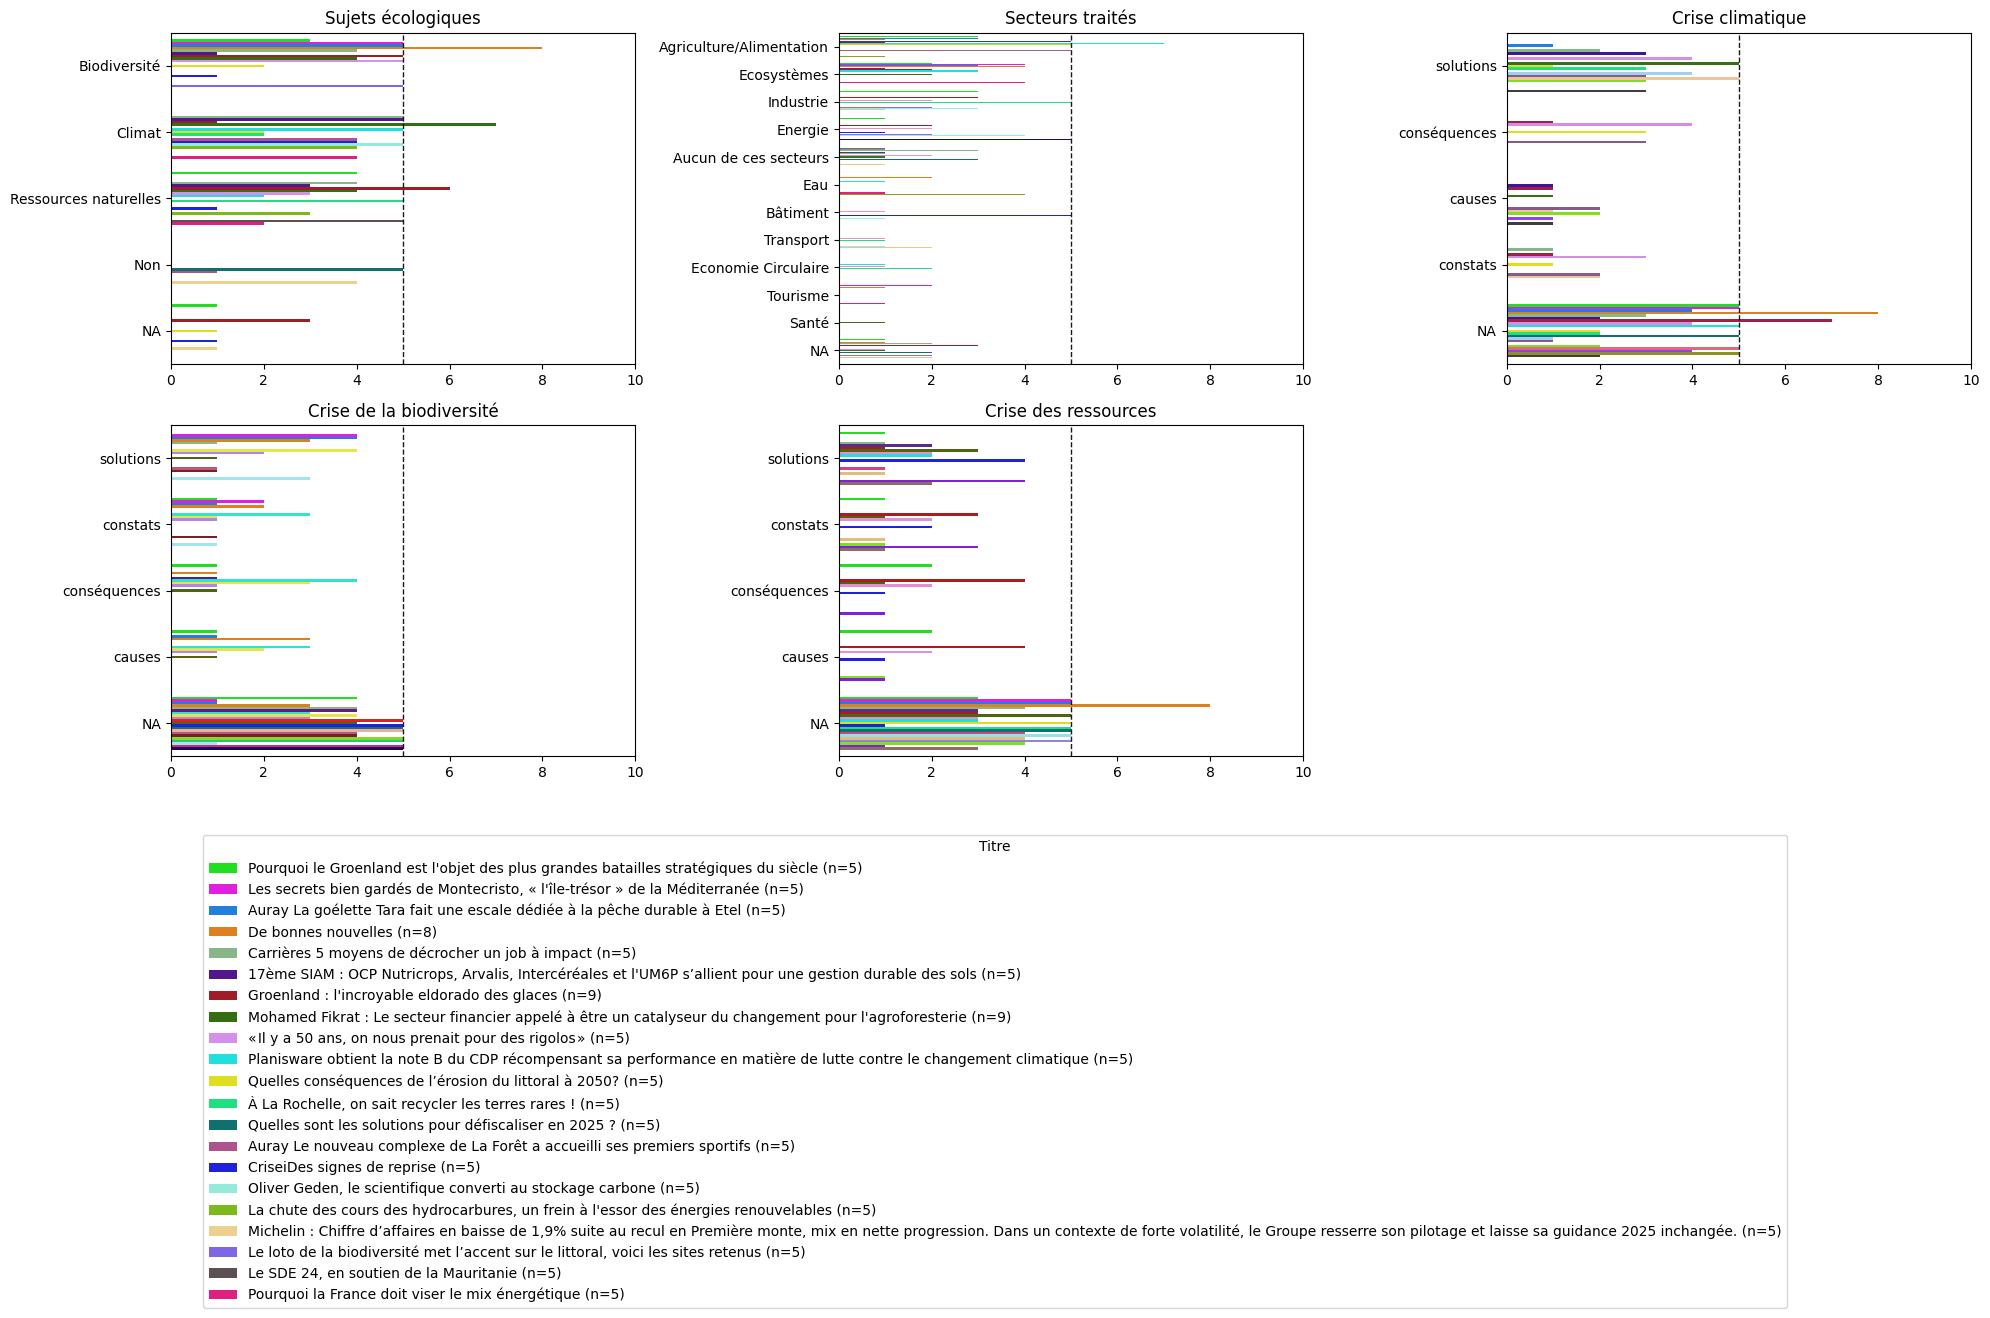

In [34]:
# Remplacer NaN par une modalité explicite
cols = [
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
    "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
    "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?"
]

titles = [
    "Sujets écologiques",
    "Secteurs traités",
    "Crise climatique",
    "Crise de la biodiversité",
    "Crise des ressources" 
]

# Graphique des countplots
plot_countplots(df_base, cols, titles, hue="Titre", na_label="NA", max_x=10)

In [35]:
# Export des données agrégées
df_base_sorted = df_base.sort_values(by=["Titre", "Pack"])
output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege_packBase_trie.xlsx")
df_base_sorted.to_excel(output_file, index=False)


PermissionError: [Errno 13] Permission denied: 'data\\Tableau_lecture_presse-ecrite_Ete2025_aggrege_packBase_trie.xlsx'

# Analyse statistique

https://theses.hal.science/LIDILEM/hal-04194831v1
=> Plusieurs méthodes de calcul ont été proposées pour quantifier le degré d’accord entre annotateurs. L’une des plus employées, malgré certains défauts (Feinstein et Cicchetti, 1990) et des restrictions sur son utilisation, est le Kappa (κ) de Cohen (Cohen, 1960). Des variations ont été proposées pour répondre à ses défauts ou limitations, comme le Kappa de Fleiss qui permet de prendre en compte trois ou plus annotateurs, ou le Kappa pondéré (Fleiss et al., 1969). D’autres méthodes ont également été développées comme le coefficient de Brennan-Prediger (Brennan et Prediger, 1981), le coefficient AC1/AC2 de Gwet (Gwet, 2008) ou plus récemment la méthode Gamma (Mathet et al., 2015). Pour cette communication, nous proposons d’examiner une mesure d’accord spécifique, l’Alpha de Krippendorff (Krippendorff, 2018). L’Alpha de Krippendorff, contrairement à d’autres mesures de l’accord inter-annotateurs, a été pensé pour répondre à des situations diverses. L’Alpha est en effet applicable quel que soit le nombre d’annotateurs et permet de prendre en compte plusieurs contraintes sur les données : • données évaluées sur différents types d’échelle (échelle nominale, ordinale, d’intervalle...) ; • échantillons de données de taille variable ; • données avec des annotations manquantes



## Test de l'alpha de Krippendorff sur une colonne spécifique, pour un article spécifique

In [94]:
# Test de l'alhpa de Krippendorff sur une colonne spécifique
col_to_test = "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?"
titre = liste_articles[6]
data_test = df_base[df_base.Titre == titre][["Personne en charge de la veille (nom, prénom)", "Titre", col_to_test]]
data_test

,"Personne en charge de la veille (nom, prénom)",Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?
6,veilleur_1,Groenland : l'incroyable eldorado des glaces,NaN
27,veilleur_10,Groenland : l'incroyable eldorado des glaces,NaN
38,veilleur_11,Groenland : l'incroyable eldorado des glaces,"Biodiversité, Ressources naturelles"
57,veilleur_12,Groenland : l'incroyable eldorado des glaces,Ressources naturelles
92,veilleur_2,Groenland : l'incroyable eldorado des glaces,"Biodiversité, Ressources naturelles"
134,veilleur_4,Groenland : l'incroyable eldorado des glaces,NaN
154,veilleur_5,Groenland : l'incroyable eldorado des glaces,"Ressources naturelles, Biodiversité"
183,veilleur_7,Groenland : l'incroyable eldorado des glaces,"Climat, Biodiversité, Ressources naturelles"
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,"Ressources naturelles, Biodiversité"


In [95]:
# Test encodaoge
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Nettoyage : remplacer NaN par listes vides et transformer en liste de labels
data_test_encoded = data_test.copy()
data_test_encoded[col_to_test] = data_test_encoded[col_to_test].fillna("").apply(lambda x: [s.strip() for s in x.split(",")] if x else [])

# 2. Initialiser l'encodeur multilabel
mlb = MultiLabelBinarizer()

# 3. Transformer les données
encoded = mlb.fit_transform(data_test_encoded[col_to_test])

# 4. Créer un DataFrame avec les colonnes binaires
encoded_df = pd.DataFrame(encoded, columns=mlb.classes_, index=data_test_encoded.index)

# 5. Fusionner avec le DataFrame original
df_encoded = pd.concat([data_test_encoded, encoded_df], axis=1)

In [96]:
df_encoded

,"Personne en charge de la veille (nom, prénom)",Titre,Le sujet de l'article concerne-t-il un ou plusieurs sujets écologiques?,Biodiversité,Climat,Ressources naturelles
6,veilleur_1,Groenland : l'incroyable eldorado des glaces,[],0,0,0
27,veilleur_10,Groenland : l'incroyable eldorado des glaces,[],0,0,0
38,veilleur_11,Groenland : l'incroyable eldorado des glaces,"[Biodiversité, Ressources naturelles]",1,0,1
57,veilleur_12,Groenland : l'incroyable eldorado des glaces,[Ressources naturelles],0,0,1
92,veilleur_2,Groenland : l'incroyable eldorado des glaces,"[Biodiversité, Ressources naturelles]",1,0,1
134,veilleur_4,Groenland : l'incroyable eldorado des glaces,[],0,0,0
154,veilleur_5,Groenland : l'incroyable eldorado des glaces,"[Ressources naturelles, Biodiversité]",1,0,1
183,veilleur_7,Groenland : l'incroyable eldorado des glaces,"[Climat, Biodiversité, Ressources naturelles]",1,1,1
215,veilleur_9,Groenland : l'incroyable eldorado des glaces,"[Ressources naturelles, Biodiversité]",1,0,1


In [97]:
# Calcul de l'alpha de Krippendorff pour le multi-label
krippendorff_alpha = krippendorff.alpha(
    df_encoded[mlb.classes_].values,
    level_of_measurement='nominal'
)
krippendorff_alpha

np.float64(0.1694444444444445)

In [98]:
# Insertion dans le dataframe
result_df = pd.DataFrame({
    "Titre": [titre],
    "Variable": [col_to_test],
    "Alpha de Krippendorff - multilabel": [krippendorff_alpha]
})
result_df

,Titre,Variable,Alpha de Krippendorff - multilabel
0,Groenland : l'incroyable eldorado des glaces,Le sujet de l'article concerne-t-il un ou plus...,0.169444


In [102]:
# Test pour chaque modalité
results = []
col_veilleur = "Personne en charge de la veille (nom, prénom)"
for label in mlb.classes_:
    # Items × codeurs
    wide = df_encoded.pivot_table(index="Titre", columns=col_veilleur, values=label, aggfunc="max").astype(float)
    a = krippendorff.alpha(reliability_data=wide.T.values, level_of_measurement="nominal")
    results.append({"Modalité": label, "Alpha": a})

df_alpha = pd.DataFrame(results).sort_values("Modalité").reset_index(drop=True)
df_alpha


,Modalité,Alpha
0,Biodiversité,0.0
1,Climat,0.0
2,Ressources naturelles,0.0


In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import krippendorff

# --- Paramètres (adapte les noms de colonnes) ---
COL_CODER = "Personne en charge de la veille (nom, prénom)"
COL_ITEM  = "Titre"
QUESTION_COLS = [
    # liste de tes colonnes "questions"
    "Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?",
    "L'article évoque-t-il les causes, conséquences, solutions ou constats d'une des crises écologiques?",
       "L'article traite-t-il d'un ou plusieurs secteurs en particulier ?",
       "Si l'article aborde des SOLUTIONS, sur quel(s) secteur(s) portent ces solutions?",
       "Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?",
       "Quels enjeux sont évoqués ?",
       "L'article parle-t-il d'un évènement climatique?",
       "Si l'article parle de la crise de la biodiversité, évoque-t-il les causes, conséquences, solutions ou constats ?",
       "Type(s) de milieu mentionné(s)?",
       "L'article évoque-t-il les causes de l'érosion de la biodiversité?",
       "Si l'article parle de la crise des ressources, évoque-t-il les causes, conséquences, solutions ou constats ?"
]

# --- Utilitaires ---
def to_list_multilabel(x):
    if isinstance(x, list): return [s.strip() for s in x]
    if pd.isna(x) or not str(x).strip(): return []
    return [s.strip() for s in str(x).split(",")]

def is_multilabel_series(s: pd.Series) -> bool:
    # Heuristique simple : présence de virgule quelque part, ou listes
    return any(
        (isinstance(v, list) and len(v) > 1) or (isinstance(v, str) and ("," in v))
        for v in s.dropna().head(200)  # échantillon rapide
    )

def alpha_nominal_from_wide(wide_items_x_coders: pd.DataFrame) -> float:
    # krippendorff attend codeurs x items
    M = wide_items_x_coders.T.values.astype(float)
    return krippendorff.alpha(reliability_data=M, level_of_measurement="nominal")

# --- Calcul ---
def alpha_per_question(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Retourne:
      - summary_df: alpha par question (et, si multilabel, moyenne des alphas des modalités)
      - details_df: alpha par modalité pour les questions multilabel
    Hypothèse: chaque article (item) a été codé par ≥ 5 veilleurs (donc pas de filtre spécial).
    """
    summary_rows = []
    details_rows = []

    for q in QUESTION_COLS:
        s = df[q]
        if is_multilabel_series(s):
            # ----- Multilabel : alpha par modalité, puis moyenne -----
            tmp = df[[COL_CODER, COL_ITEM, q]].copy()
            tmp["_labels"] = tmp[q].apply(to_list_multilabel)

            mlb = MultiLabelBinarizer()
            Y = mlb.fit_transform(tmp["_labels"])
            labels = list(mlb.classes_)
            bin_df = pd.concat([tmp[[COL_CODER, COL_ITEM]], pd.DataFrame(Y, columns=labels, index=tmp.index)], axis=1)

            alphas = []
            for lbl in labels:
                wide = bin_df.pivot_table(index=COL_ITEM, columns=COL_CODER, values=lbl, aggfunc="max").astype(float)
                a = alpha_nominal_from_wide(wide)
                alphas.append(a)
                details_rows.append({"Question": q, "Modalité": lbl, "Alpha_modalité": a})

            alpha_mean = float(np.nanmean(alphas)) if len(alphas) else np.nan
            summary_rows.append({"Question": q, "Type": "multilabel", "Alpha_question": alpha_mean, "Nb_modalités": len(labels)})
        else:
            # ----- Monocatégoriel : alpha direct (nominal) -----
            # Pivot (items x codeurs) avec la catégorie telle quelle
            wide_cat = df.pivot_table(index=COL_ITEM, columns=COL_CODER, values=q, aggfunc="first")

            # Encoder chaque colonne (codeur) en nombres tout en conservant NaN
            def encode_col(col):
                codes, uniques = pd.factorize(col, sort=True)
                ser = pd.Series(codes, index=col.index).replace(-1, np.nan)
                return ser.astype(float)

            wide_num = wide_cat.apply(encode_col, axis=0)
            a = alpha_nominal_from_wide(wide_num)
            summary_rows.append({"Question": q, "Type": "mono", "Alpha_question": a, "Nb_modalités": wide_cat.nunique().sum()})

    summary_df = pd.DataFrame(summary_rows).sort_values("Alpha_question", ascending=False).reset_index(drop=True)
    details_df = pd.DataFrame(details_rows) if details_rows else pd.DataFrame(columns=["Question", "Modalité", "Alpha_modalité"])
    return summary_df, details_df



In [119]:
# --- Utilisation ---
summary, details = alpha_per_question(df_base)

In [120]:
summary

,Question,Type,Alpha_question,Nb_modalités
0,Le sujet de l'article concerne-t-il un ou plus...,multilabel,0.621917,4
1,"Si l'article aborde des SOLUTIONS, sur quel(s)...",multilabel,0.406993,10
2,Type(s) de milieu mentionné(s)?,multilabel,0.369990,16
3,L'article traite-t-il d'un ou plusieurs secteu...,multilabel,0.304940,11
4,L'article évoque-t-il les causes de l'érosion ...,multilabel,0.302392,27
5,"Si l'article parle de la crise climatique, évo...",multilabel,0.227719,4
6,"Si l'article parle de la crise des ressources,...",multilabel,0.155294,4
7,L'article parle-t-il d'un évènement climatique?,multilabel,0.127926,7
8,Si l'article parle de la crise de la biodivers...,multilabel,0.117937,4
9,Quels enjeux sont évoqués ?,multilabel,0.072475,11


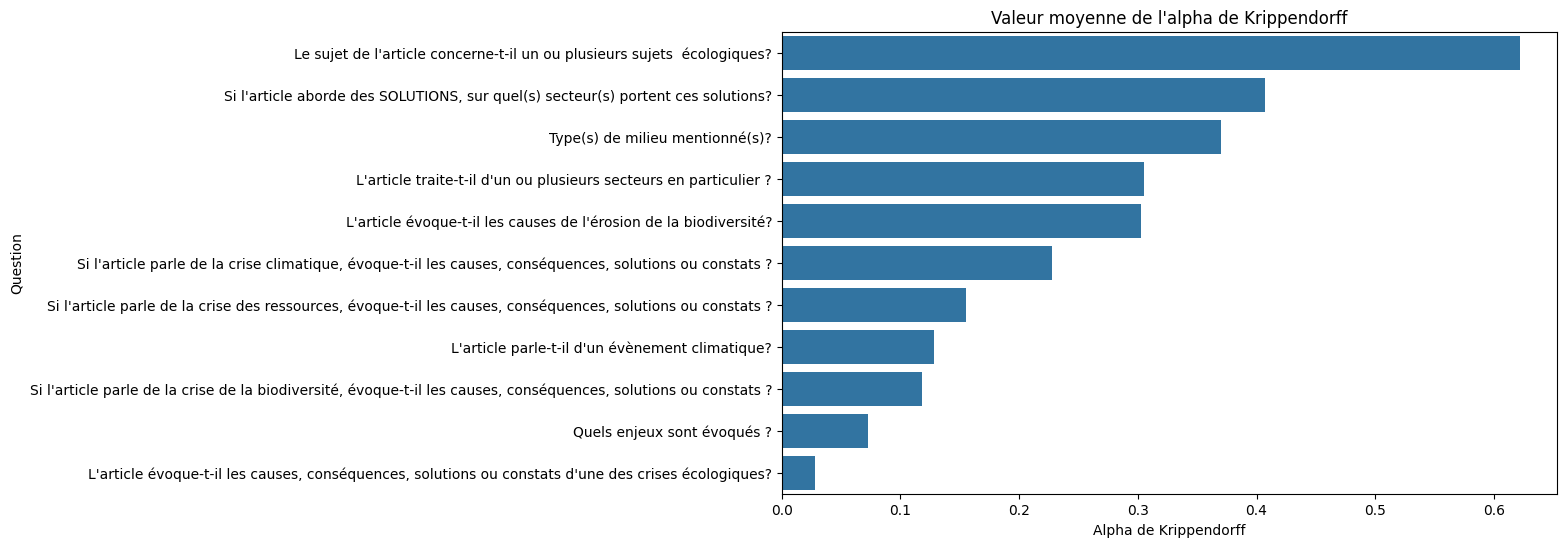

In [126]:
# Alpha moyen par question
plt.figure(figsize=(10, 6)) 

sns.barplot(
    data=summary,
    x="Alpha_question", y="Question")

plt.title("Valeur moyenne de l'alpha de Krippendorff")
plt.xlabel("Alpha de Krippendorff")
plt.ylabel("Question")
plt.show()

In [121]:
details

,Question,Modalité,Alpha_modalité
0,Le sujet de l'article concerne-t-il un ou plus...,Biodiversité,0.612439
1,Le sujet de l'article concerne-t-il un ou plus...,Climat,0.656480
2,Le sujet de l'article concerne-t-il un ou plus...,Non,0.783019
3,Le sujet de l'article concerne-t-il un ou plus...,Ressources naturelles,0.435730
4,"L'article évoque-t-il les causes, conséquences...",causes,0.000000
...,...,...,...
97,L'article évoque-t-il les causes de l'érosion ...,érosion des sols,0.287667
98,"Si l'article parle de la crise des ressources,...",causes,0.153680
99,"Si l'article parle de la crise des ressources,...",constats,0.108086
100,"Si l'article parle de la crise des ressources,...",conséquences,0.153680


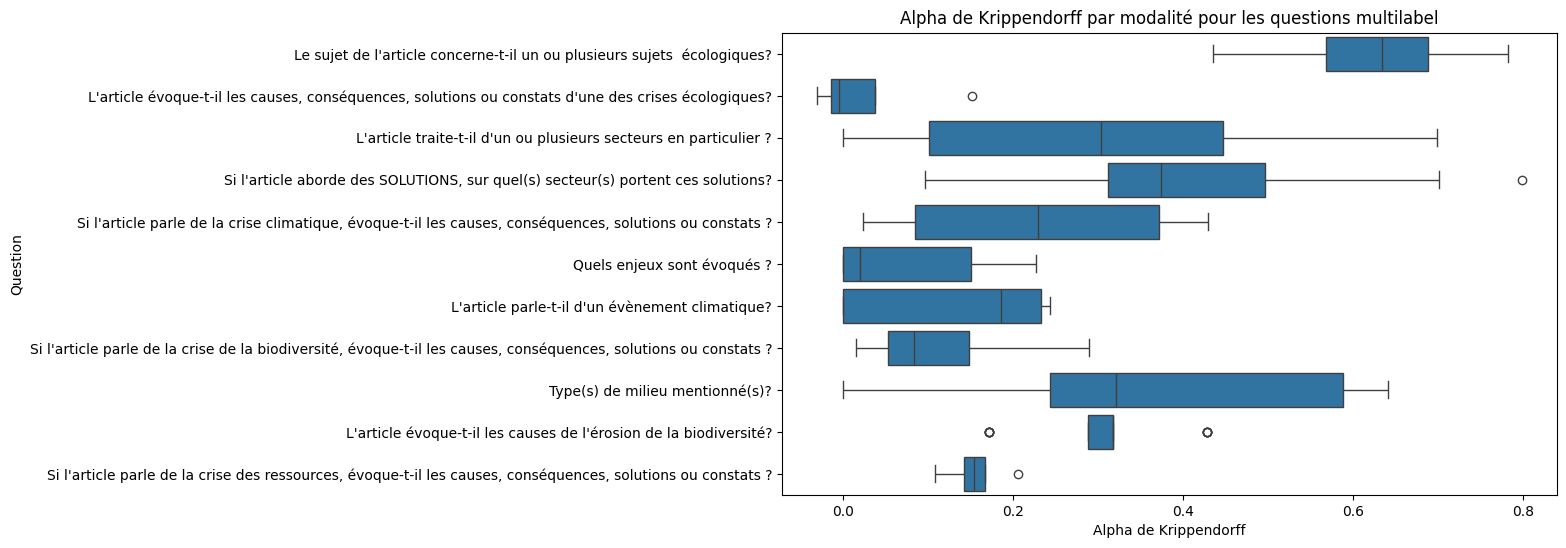

In [ ]:
# Alpha par modalité pour les questions multilabel
plt.figure(figsize=(10, 6))
sns.boxplot(data=details, x="Alpha_modalité", y="Question")
plt.title("Alpha de Krippendorff par modalité pour les questions multilabel")
plt.xlabel("Alpha de Krippendorff")
plt.ylabel("Question")
plt.show()

## Alpha par article et variable

In [86]:
# Boucle sur tous les articles, toutes les colonnes
result_df = pd.DataFrame()
for titre in df_base.Titre.unique():  
    for col_to_test in df_base.columns[4:16]:
        
        # Créer le dataset
        data_test = df_base[df_base.Titre == titre][["Personne en charge de la veille (nom, prénom)", "Titre", col_to_test]]    
        data_test_encoded = data_test.copy()
        
        # Vérification si la colonne est vide:
        if data_test_encoded[col_to_test].isna().all():
            print(f"La colonne '{col_to_test}' pour l'article '{titre}' est vide. Passer à la suivante.")
            krippendorff_alpha = None
            
        else:
            # Nettoyage : remplacer NaN par listes vides et transformer en liste de labels
            data_test_encoded[col_to_test] = data_test_encoded[col_to_test].fillna("").apply(lambda x: [s.strip() for s in x.split(",")] if x else [])
  
            # Initialiser l'encodeur multilabel
            mlb = MultiLabelBinarizer() 
            
            # Transformer les données
            encoded = mlb.fit_transform(data_test_encoded[col_to_test])
            
            # Créer un DataFrame avec les colonnes binaires
            encoded_df = pd.DataFrame(encoded, columns=mlb.classes_, index=data_test_encoded.index)
            
            # Fusionner avec le DataFrame original
            df_encoded = pd.concat([data_test_encoded, encoded_df], axis=1)

            # Calcul de l'alpha de Krippendorff
            try:
                krippendorff_alpha = krippendorff.alpha(
                    df_encoded[mlb.classes_].values,
                    level_of_measurement='nominal'
                )   
            except Exception as e:
                print(f"Erreur lors du calcul de l'alpha de Krippendorff multilabelpour '{titre}' et '{col_to_test}': {e}")
                krippendorff_alpha = None
            
            
        # Insertion dans le dataframe
        result_df = pd.concat([
            result_df,
            pd.DataFrame({
                "Titre": [titre],
                "Variable": [col_to_test],
                "Alpha de Krippendorff Multilabel": [krippendorff_alpha]
            })
        ], ignore_index=True)       

# Affichage des résultats
result_df

La colonne 'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?' pour l'article 'Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle' est vide. Passer à la suivante.
La colonne 'Quels enjeux sont évoqués ?' pour l'article 'Pourquoi le Groenland est l'objet des plus grandes batailles stratégiques du siècle' est vide. Passer à la suivante.
Erreur lors du calcul de l'alpha de Krippendorff multilabelpour 'Les secrets bien gardés de Montecristo, « l'île-trésor » de la Méditerranée' et 'Le sujet de l'article concerne-t-il un ou plusieurs sujets  écologiques?': There has to be more than one value in the domain.
La colonne 'Si l'article parle de la crise climatique, évoque-t-il les causes, conséquences, solutions ou constats ?' pour l'article 'Les secrets bien gardés de Montecristo, « l'île-trésor » de la Méditerranée' est vide. Passer à la suivante.
La colonne 'Quels enjeux sont évoqués ?' pour l'article 'Les

,Titre,Variable,Alpha de Krippendorff Multilabel
0,Pourquoi le Groenland est l'objet des plus gra...,Le sujet de l'article concerne-t-il un ou plus...,-0.071429
1,Pourquoi le Groenland est l'objet des plus gra...,"L'article évoque-t-il les causes, conséquences...",-0.113636
2,Pourquoi le Groenland est l'objet des plus gra...,L'article traite-t-il d'un ou plusieurs secteu...,-0.055556
3,Pourquoi le Groenland est l'objet des plus gra...,"Si l'article aborde des SOLUTIONS, sur quel(s)...",0.000000
4,Pourquoi le Groenland est l'objet des plus gra...,"Si l'article parle de la crise climatique, évo...",NaN
...,...,...,...
247,Pourquoi la France doit viser le mix énergétique,Si l'article parle de la crise de la biodivers...,NaN
248,Pourquoi la France doit viser le mix énergétique,Type(s) de milieu mentionné(s)?,NaN
249,Pourquoi la France doit viser le mix énergétique,L'article évoque-t-il les causes de l'érosion ...,NaN
250,Pourquoi la France doit viser le mix énergétique,"Si l'article parle de la crise des ressources,...",-0.071429


In [88]:
# 1. Transformation en tableau croisé
heatmap_data = result_df.pivot(index="Variable", columns="Titre", values="Alpha de Krippendorff Multilabel")

In [25]:
# Exporte le DataFrame agrégé dans un fichier Excel
output_file = os.path.join(data_dir, "Analyse_lecture_presse-ecrite_Ete2025_Krippendorff.csv")
result_df.to_csv(output_file, index=False)

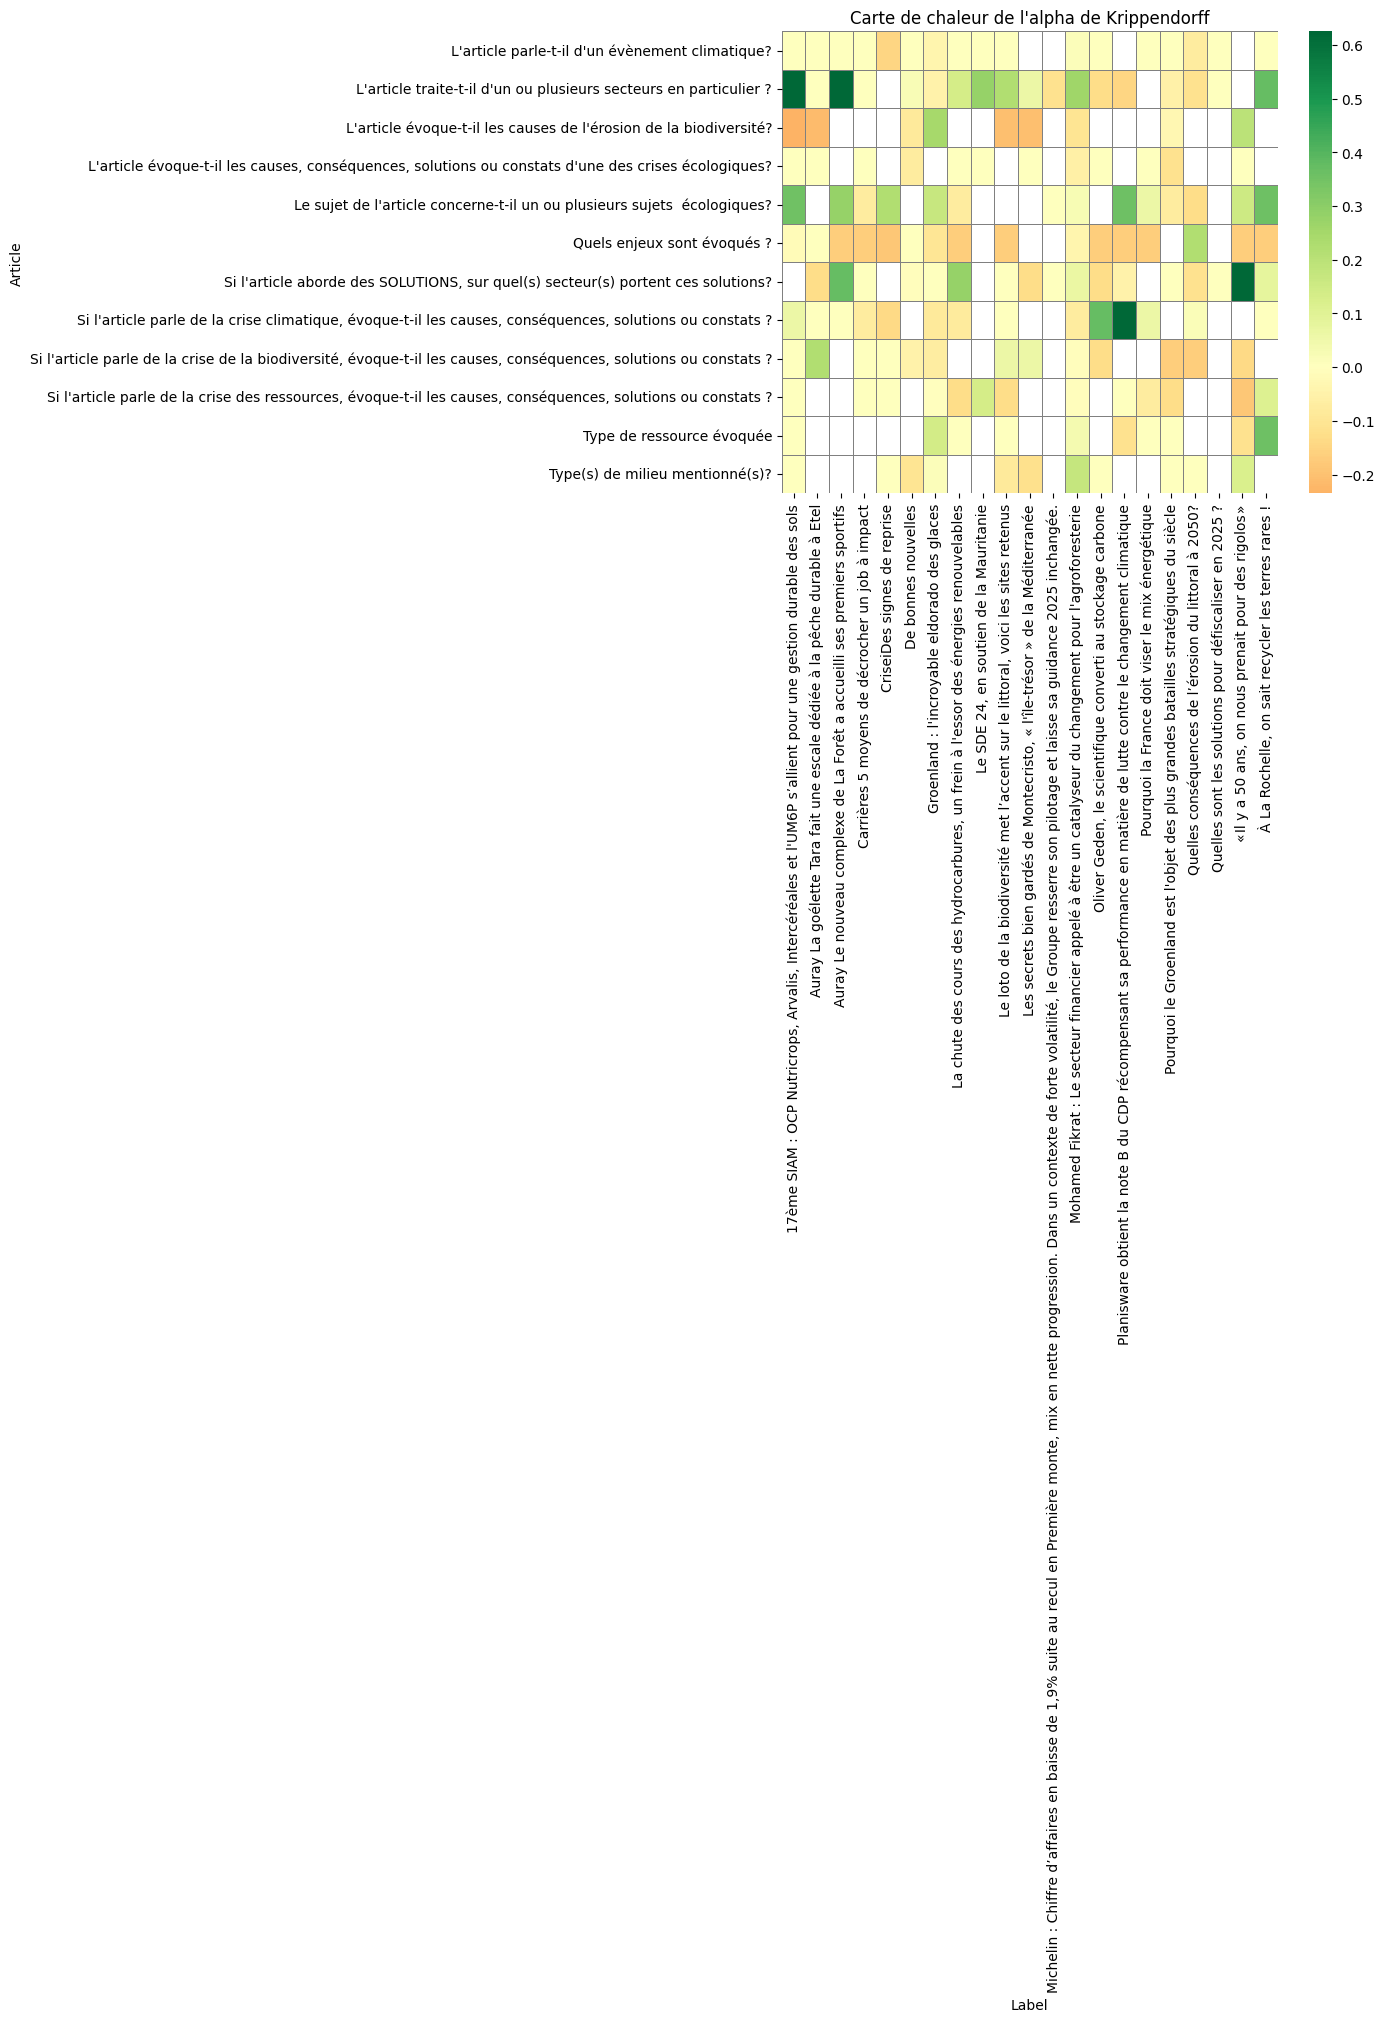

In [89]:
# 2. Création du heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=False,        # Afficher les valeurs
    cmap="RdYlGn",   # Palette de couleurs
    center=0,          # Centre la palette sur zéro
    linewidths=0.5,    # Lignes séparatrices
    linecolor="grey"
)

plt.title("Carte de chaleur de l'alpha de Krippendorff")
plt.xlabel("Label")
plt.ylabel("Article")
plt.show()

## Alpha par variable

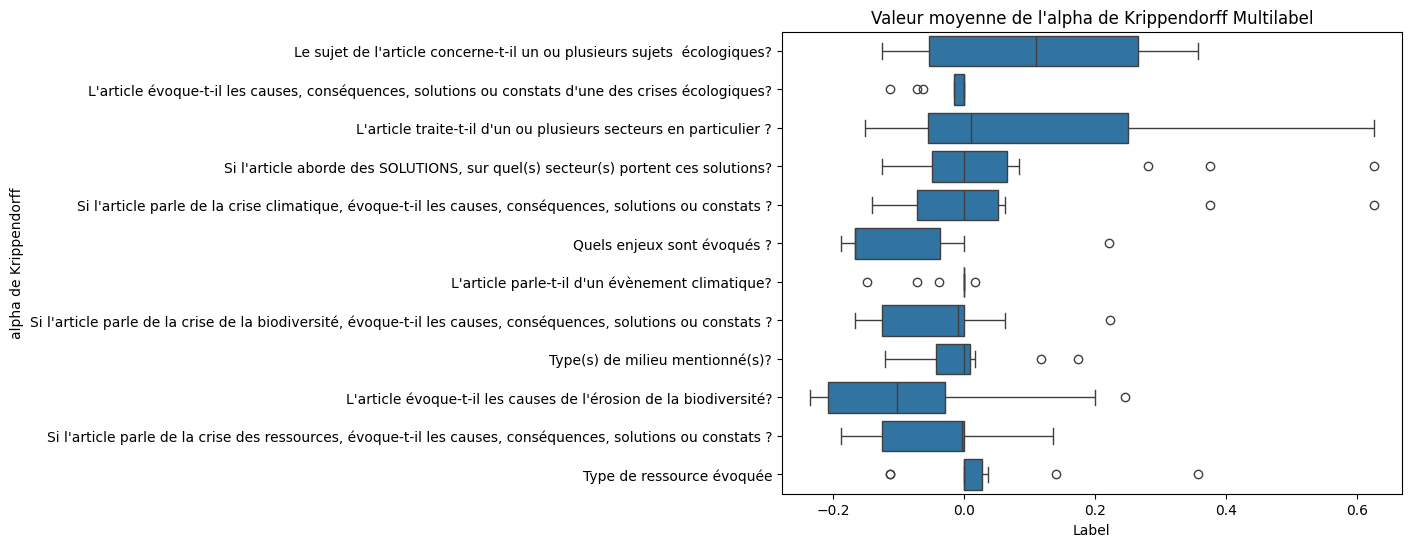

In [91]:
# Valeur moyenne par type de variable
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=result_df,
    y="Variable",
    x="Alpha de Krippendorff Multilabel",
)

plt.title("Valeur moyenne de l'alpha de Krippendorff Multilabel")
plt.xlabel("Label")
plt.ylabel("alpha de Krippendorff")
plt.show()

# Exploration des commentaires

## Lecture humaine

In [90]:
# Extraction ddes commentaire pour chaque article
df_base_comment = df_base.groupby("Titre")["Commentaire"].apply(lambda s: " || ".join(map(str, s.dropna()))).reset_index(name="Commentaire")
df_base_amelior = df_base.groupby("Titre")["Proposition d'amélioration du tableau"].apply(lambda s: " || ".join(map(str, s.dropna()))).reset_index(name="proposition_amelioration")

In [93]:
# Fusion des commentaires et propositions d'amélioration
qualitative_df_base = pd.merge(
    df_base_comment,
    df_base_amelior,
    on="Titre",
    how="outer"
)

In [ ]:
# Visualisation pour verification
qualitative_df_base

,Titre,Commentaire,proposition_amelioration
0,"17ème SIAM : OCP Nutricrops, Arvalis, Intercér...",L'article évoque un partenariat entre institut...,l'article parle du besoin d'adaptation au chan...
1,Auray La goélette Tara fait une escale dédiée ...,L'article ne parle pas directement de surexplo...,J'ai mis secteur Agriculture/alimentation mais...
2,Auray Le nouveau complexe de La Forêt a accuei...,L'article évoque en passant les caractéristiqu...,"je trouve que le mot ""crise"" fait beaucoup dou..."
3,Carrières 5 moyens de décrocher un job à impact,Difficile à classer... Cet article parle de co...,La solution évoquée ici est de s'investir dans...
4,CriseiDes signes de reprise,L'article aborde un sujet écologique (l'agricu...,Sujet consommation et finance/aides ici est év...
5,De bonnes nouvelles,L'article evoque les critiques qui sont faites...,"Etant donné que c'est de la pêche de Loisirs, ..."
6,Groenland : l'incroyable eldorado des glaces,Meme article que premiere ligne || nan || Manq...,i lmanque clairement le lexique pour s'assurer...
7,"La chute des cours des hydrocarbures, un frein...",nan || La colonne enjeux évoqués dans la case ...,Différence Energies fossiles et Energies renou...
8,"Le SDE 24, en soutien de la Mauritanie","nan || nan || Déserts et oasis en Mauritanie, ...",
9,Le loto de la biodiversité met l’accent sur le...,nan || nan || nan || nan || RAS,


In [96]:
# Exporte le DataFrame agrégé dans un fichier Excel
qualitative_output_file = os.path.join(data_dir, "Tableau_lecture_presse-ecrite_Ete2025_aggrege_qualitative_data.xlsx")
qualitative_df_base.to_excel(qualitative_output_file, index=False)

## Machine Learning

In [28]:
# Import des packages nécessaires
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud
from utils import *

### TF-IDF

In [29]:
# Gestion des stopwords
french_stopwords = set("""
au aux avec ce ces dans de des du elle en et eux il je la le leur lui ma mais me même mes 
moi mon ne nos notre nous on ou par pas pour qu que qui sa se ses son sur ta te tes toi ton tu un une vos votre vous 
c d j l à m n s t y été étée étées étés étant étante étants étantes suis es est sommes êtes sont serai seras sera serons 
serez seront serais serait serions seriez seraient étais était étions étiez étaient fus fusent fut fûmes fûtes furent sois 
soit soyons soyez soient fusse fusses fût fussions fussiez fussent ai as avons avez ont aurai auras aura aurons aurez auront 
aurais aurait aurions auriez auraient avais avait avions aviez avaient eut eûmes eûtes eurent aie aies ait ayons ayez aient 
eusse eusses eût eussions eussiez eussent ceci cela cet cette ici il y a il y avait il y aura il y aurait il s'agit 
très plus moins comme aussi plutôt quand où alors donc cependant toutefois néanmoins mais car parce que puisque puisque 
depuis dès afin afin que afin de avant après pendant vers entre chez sans sous sur déjà encore toujours jamais rien tout 
tous toutes chaque aucun aucune quelques quelqu'un quelque quelque chose plusieurs tant tellement tellement que si sinon
article parle evoque évoquent évoque traite traitent traiter traitant traité traitée traitées traités être être à la 
reportage parlant evoquant traitant aborder aborde abordent aborderont aborderait aborderont abordé abordée 
abordées abordés abordant
""".split())

positive_words = set("""
excellent superbe formidable génial satisfaisant positif clair utile pertinent intéressant convaincant rigoureux 
constructif agréable magnifique bravo bien bon excellente admiré apprécié cohérent
""".split())

negative_words = set("""
mauvais médiocre nul horrible décevant négatif confus inutile hors-sujet faux mensonger problématique biaisé agressif
colérique incohérent pauvre faible catastrophique lamentable navrant tristesse colère honte scandale honteux dommage 
critique difficile déplorable inquiétant alarmant choquant désastreux
""".split())



In [30]:
# Clean
df_base["Commentaire"] = df_base["Commentaire"].astype(str)
df_base["Commentaire_clean"] = df_base["Commentaire"].apply(lambda s: clean_text(s, french_stopwords))
df_base["Commentaire_length"] = df_base["Commentaire_clean"].str.len()

In [31]:
df_base[["Commentaire","Commentaire_clean", "Commentaire_length"]].head(10)

,Commentaire,Commentaire_clean,Commentaire_length
0,Reportage abordant plusieurs enjeux du Groenla...,enjeux groenland notamment présence terre rare...,160
1,Action de protection de l'Ile de Monte Cristo ...,action protection l'ile monte cristo seulement...,75
2,L'article ne parle pas directement de surexplo...,l'article directement surexploitation ressourc...,62
3,L'article evoque les critiques qui sont faites...,l'article les critiques faites pecheurs loisir...,210
4,Difficile à classer... Cet article parle de co...,difficile classer comment trouver job impact d...,106
5,L'article évoque un partenariat entre institut...,l'article partenariat instituts techniques che...,176
6,Meme article que premiere ligne,meme premiere ligne,19
7,Article parlant de solution pour l'adaptation ...,solution l'adaptation ecosystèmes forestiers c...,66
8,Mise en valeur de l'agriculture bio via un tem...,mise valeur l'agriculture bio via temoignage m...,58
19,"Comme son titre l'indique, l'article ne traite...",titre l'indique l'article enjeux écologiques j...,296


In [32]:
# TF-IDF (1-2 grams helps capture short phrases)
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=1)
X = tfidf.fit_transform(df_base["Commentaire_clean"])

In [33]:
# Kmeans clustering
if X.shape[0] >= 4:
    k = choose_k_by_silhouette(X, k_min=2, k_max=8)
else:
    k = 1
if k == 1:
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_terms = {0: []}
else:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    cluster_terms = extract_top_terms_per_cluster(tfidf, X, labels, topn=10)
df_base["cluster"] = labels

In [34]:
# Nombre de clusters
n_clusters = df_base["cluster"].nunique()

In [36]:
df_base["cluster"].value_counts()

cluster
1    63
0    51
2     2
Name: count, dtype: int64

In [40]:
def plot_kmeans(X, km_model, use_pca=True, title=None):
    """
    X : ndarray de forme (n_samples, n_features)
    use_pca : projeter en 2D si n_features > 2
    """
    labels = km_model.labels_
    centers = km_model.cluster_centers_

    # Projection 2D (PCA si besoin)
    if X.shape[1] > 2 and use_pca:
        pca = PCA(n_components=2, random_state=42)
        X2 = pca.fit_transform(X)
        C2 = pca.transform(centers)
        xlabel, ylabel = "PC1", "PC2"
    else:
        X2 = X[:, :2]
        C2 = centers[:, :2] if centers.shape[1] >= 2 else np.c_[centers, np.zeros((centers.shape[0], 2 - centers.shape[1]))]
        xlabel, ylabel = "x1", "x2"

    # Scatter des points
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=X2[:, 0],
        y=X2[:, 1],
        c=labels.astype("float"),
    )
    plt.xlabel("F1")
    plt.ylabel("F2")
    plt.title(f"KMeans (k={n_clusters})")
    plt.legend()
    plt.tight_layout()
    plt.show()

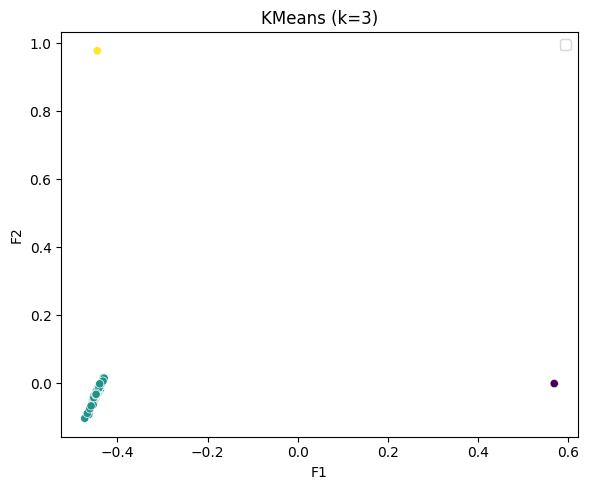

In [41]:
# Visualisation
plot_kmeans(X, km_model=km)